# Traitement d'images

Le but de ce notebook est de vous offrir un aperçu des possibilités offertes par la bibliothèque [**scikit image**](https://scikit-image.org/). 


In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from skimage import color
from skimage import feature
from skimage import segmentation
from skimage import morphology

## Activité 1 : binarisation

Nous allons partir de l'image suivante, qui représente la lettre **V** en langue des signes :
![](data/LSF/LSQ_v.jpg)

Notre objectif est de produire une binarisation de cette image, de manière à avoir le fond en noir et la main en blanc :
![](data/LSF/LSQ_v_bin.jpg)

L'intérêt de cette binarisation est qu'elle permettra par la suitre de décrire la forme de la main, par exemple dans le cadre d'un programme de traduction automatique de la langue des signes. Mais nous n'irons pas jusque là. 

1. Utiliser la fonction [imread](http://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread)  du module **io** pour charger l'image **data/LSF/LSQ_v.jpg** 
2. Afficher cette image avec les fonctions [imshow](http://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imshow) et [show](http://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.show) du module **io** 

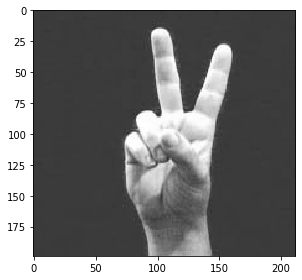

In [2]:
srce = io.imread("data/LSF/LSQ_v.jpg")
grey = color.rgb2gray(srce)
io.imshow(grey)

<button data-toggle="collapse" data-target="#sol2" class='btn btn-primary'>Solution</button>
<div id="sol2" class="collapse">

1. ```python
from skimage.io import imread
img = imread('data/LSF/LSQ_v.jpg')
```

2. ```python
fig, ax = plt.subplots()
ax.imshow(img)
io.show() #optional in Jupyter 
```

</div>

Nous allons maintenant convertir l'image en niveaux de gris, c'est-à-dire ne conserver que la luminosité des pixels.
1. Convertir l'image en niveaux de gris avec la fonction [rgb2gray](http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2grey) du module **color**.
2. Afficher l'image en niveaux de gris.

Les niveaux de gris de l'image obtenue vont de 0 (noir) à 1 (blanc). 

<button data-toggle="collapse" data-target="#sol3" class='btn btn-primary'>Solution</button>
<div id="sol3" class="collapse">

1. ```python
from skimage.color import rgb2gray
img_gray = rgb2gray(img)
```

2. ```python
fig, (ax1, ax2)  = plt.subplots(1,2)
ax1.imshow(img)
ax2.imshow(img_gray,  cmap=plt.cm.Greys_r)
```

</div>

Nous voulons maintenant binariser cette image, c'est-à-dire choisir un niveau de gris de manière à ce que :
* tous les pixels avec un niveau de gris inférieur soient considérés comme appartenant au fond et mis en noir ;
* tous les pixels avec un niveau de gris supérieur ou égal soient considérés comme appartenant à la main et mis en blanc.

Ce niveau de gris est appelé **seuil**.

3. Créer un filtre qui extrait tous les pixels de la main. 
4. Mettre tous ces pixels en blancs et afficher l'image obtenue. 

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


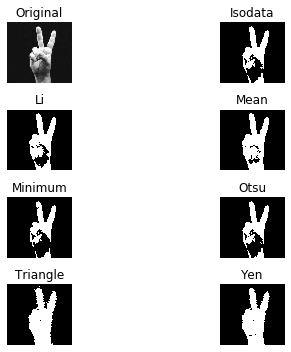

In [6]:
from skimage import filters
fig, axes = filters.try_all_threshold(grey)

In [9]:
threshold = filters.threshold_yen(grey)
binnarised = grey > threshold

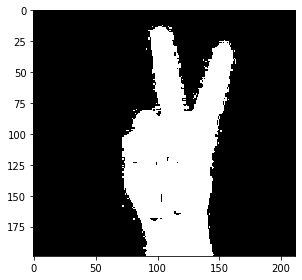

In [10]:
io.imshow(binnarised)

<button data-toggle="collapse" data-target="#sol4" class='btn btn-primary'>Solution</button>
<div id="sol4" class="collapse">

3. ```python
mask = img_gray > 0.25
mask
```

4. ```python
img_gray[mask] = 1
plt.imshow(img_gray, cmap=plt.cm.gray)
```

</div>

**Scikit Image** propose plusieurs méthodes pour sélectionner un seuil de binarisation. Elle offre également une méthode très pratique, [try_all_threshold](http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.try_all_threshold) qui permet de tester toutes ces méthodes et d'afficher les résultats obtenus. Nous allons ainsi pouvoir choisir celle qui produit le meilleur résultat avec notre image.

> Pour afficher les résultats vous devez utiliser instruction **plt.show()** après avoir appellé la fonction **try_all_threshold**

In [16]:

binnarised = morphology.binary_closing(binnarised, selem=morphology.disk(2))

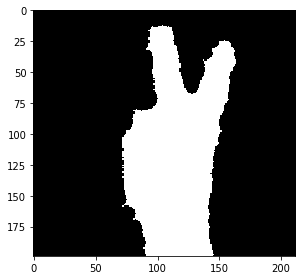

In [17]:
io.imshow(binnarised)

<button data-toggle="collapse" data-target="#sol5" class='btn btn-primary'>Solution</button>
<div id="sol5" class="collapse">

```python
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(img_gray, verbose=False)
plt.show()
```

</div>

Il ne reste plus qu'à choisir l'une des méthodes et produire une binarisation la plus propre possible de l'image. 
Modifiez le code suivant pour utiliser une fonction de binarisation plus pertinente : 

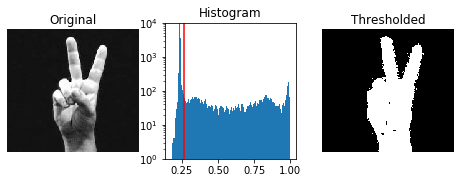

In [20]:
from skimage.filters import threshold_yen
from matplotlib import pyplot as plt

img_gray = grey
thresh = threshold_yen(img_gray)

binary = img_gray > thresh

fig, ax = plt.subplots(ncols=3, figsize=(8, 2.5))
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(img_gray, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(img_gray.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')
ax[1].set_yscale('log')
ax[1].set_ylim((1, 10000))


ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

## Activité 2 : télédétection

Nous cherchons à identifier des fermes circulaires à partir d'images satellitaires. 


Source image : https://earthobservatory.nasa.gov/images/86079/todhia-arable-farm-in-saudi-arabia

1. Lire le fichier **data/todhia_oli.jpg** contenant l'image satellitaire sur laquelle nous allons travailler.
2. Convertir cette image en niveaux de gris.
3. Binariser l'image de façon à faire resortir les fermes circulaires (en blanc).

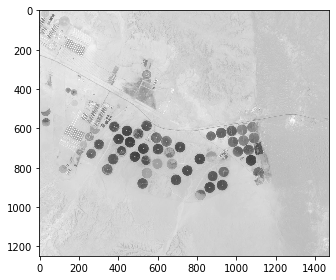

In [47]:
fermes = io.imread("data/todhia_oli.jpg", as_gray=True)
io.imshow(fermes)

In [48]:
fermes = fermes < filters.threshold_otsu(fermes)

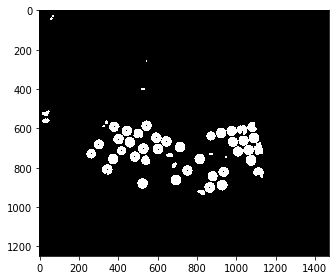

In [49]:
fermes = morphology.binary_opening(fermes, morphology.disk(5))


io.imshow(fermes)

In [50]:
lbls = morphology.label(fermes)

In [52]:
lbls[600: 610, 400: 410]

array([[9, 9, 0, 0, 0, 0, 0, 0, 0, 0],
       [9, 9, 9, 0, 0, 0, 0, 0, 0, 0],
       [9, 9, 9, 0, 0, 0, 0, 0, 0, 0],
       [9, 9, 9, 0, 0, 0, 0, 0, 0, 0],
       [9, 9, 9, 9, 0, 0, 0, 0, 0, 0],
       [9, 9, 9, 0, 0, 0, 0, 0, 0, 0],
       [9, 9, 9, 0, 0, 0, 0, 0, 0, 0],
       [9, 9, 9, 0, 0, 0, 0, 0, 0, 0],
       [9, 9, 0, 0, 0, 0, 0, 0, 0, 0],
       [9, 9, 0, 0, 0, 0, 0, 0, 0, 0]])

C:\Users\hcodeur1\.conda\envs\formation\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


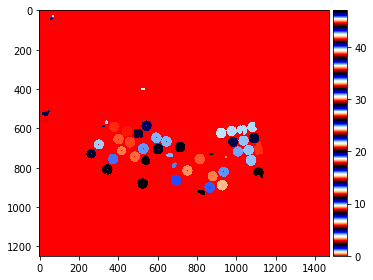

In [53]:
io.imshow(lbls, cmap="flag")

<button data-toggle="collapse" data-target="#sol6" class='btn btn-primary'>Solution</button>
<div id="sol6" class="collapse">

1. ```python
img = mpimg.imread('data/todhia_oli.jpg')
```

2. ```python
img_gray = color.rgb2gray(img)
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img_gray, cmap=plt.cm.gray)
ax.set_axis_off()
```

3. ```python
from skimage.filters import threshold_otsu
thresh = threshold_otsu(img_gray)
binary = ~morphology.closing(img_gray > thresh)
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(binary, cmap=plt.cm.gray)
ax.set_axis_off()
```

</div>

4. Identifier chacune des fermes, et représenter les à l'aide de couleurs différentes.
5. Enregistrer le résultat de la détection dans une nouvelle image.

La fonction `label` du module `morphology` permet d'identifier chaque objet séparé (composante connexe).

<button data-toggle="collapse" data-target="#sol7" class='btn btn-primary'>Solution</button>
<div id="sol7" class="collapse">

4. ```python
# Add a label for each object
label_image = morphology.label(binary)
# Colorize each label
image_label_overlay = color.label2rgb(label_imageµ, image=img_gray,  bg_label=0)
# Show the image and its labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
ax.set_axis_off()
```

5. ```python
io.imwrite('todhia_oli_detected.png', image_label_overlay)
```

</div>

Les techniques de **détection de contours** peuvent aussi permettre d'identifier les fermes circulaires de cette image aérienne.
Essayez de mettre en application les méthodes proposées dans le tutoriel suivant :
[https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_blob.html](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_blob.html)

<button data-toggle="collapse" data-target="#sol8" class='btn btn-primary'>Solution</button>
<div id="sol8" class="collapse">

```python

blobs = [(x[0],x[1],x[2]) for x in feature.blob_log(binary, 
                                                        min_sigma=15, 
                                                        max_sigma=25,
                                                        threshold=0.2,
                                                      )]
# OR
#blobs = [(x[0],x[1],x[2]) for x in feature.blob_dog(binary, 
#                                                        min_sigma=10, 
#                                                        max_sigma=25,
#                                                        threshold=0.5,
#                                                        overlap=0.6)]
# OR
#blobs = [(x[0],x[1],x[2]) for x in feature.blob_doh(binary, 
#                                                        min_sigma=10, 
#                                                        max_sigma=25,
#                                                        threshold=0.045,
#                                                      overlap=0.08)]

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1)

for blob in blobs:
    y, x, r = blob
    c = plt.Circle((x, y), r+1, color='red', linewidth=2, fill=False)
    ax.add_patch(c)

plt.imshow(img)
plt.title('Center Pivot Farms')

plt.show()
print('Number of center pivot farms detected: ' + str(len(blobs_dog)))
```
</div>

## Activité 3 : jeu des onze différences

Retrouvez les onzes différences entre ces deux images.

![](data/onze-erreurs1.jpg)
![](data/onze-erreurs2.jpg)

In [64]:
im1 = io.imread("data/onze-erreurs1.jpg", as_gray=True)
im2 = io.imread("data/onze-erreurs2.jpg", as_gray=True)
im1 = gaussian(im1, 1)
im2 = gaussian(im2, 1)

In [57]:
from skimage.filters import gaussian

C:\Users\hcodeur1\.conda\envs\formation\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  """


(0.5173143895701385, 500000)

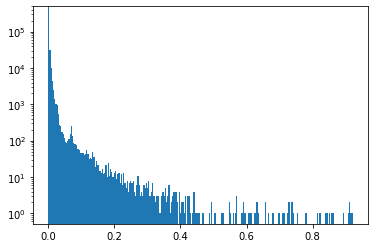

In [67]:

sqerr = (im1 - im2)**2
fig, ax = plt.subplots()
h = ax.hist(sqerr.ravel(), bins=256)
ax.set_yscale('log')
ax.set_ylim(0, 500000)

In [71]:
binned = sqerr > filters.threshold_isodata(sqerr)
binned = morphology.binary_dilation(binned, selem=morphology.disk(10))
np.unique(morphology.label(binned))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [73]:

label_image = morphology.label(binned)


In [74]:
image_label_overlay = color.label2rgb(label_image, image=im1,  bg_label=0)

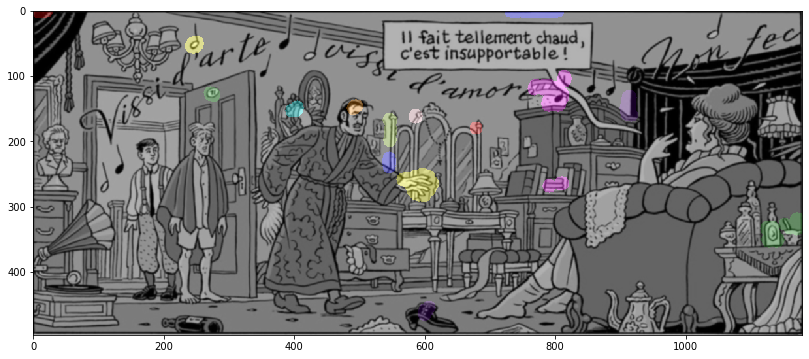

In [76]:
io.imshow(image_label_overlay)
fig = plt.gcf()
fig.set_size_inches(12, 12)


![](data/onze-erreurs1.jpg)
![](data/onze-erreurs2.jpg)

In [79]:
from skimage import exposure
im1 = exposure.equalize_hist(im1)
im2 = exposure.equalize_hist(im2)


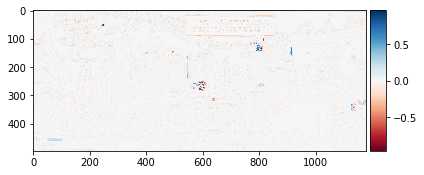

In [81]:
io.imshow((im1 - im2))

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


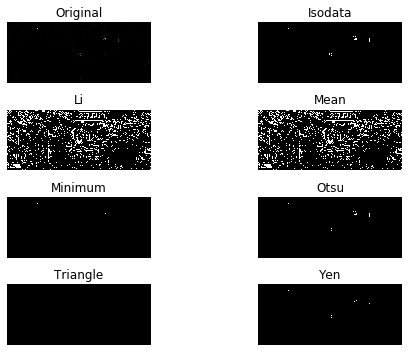

In [68]:
fig, axes = filters.try_all_threshold(sqerr)

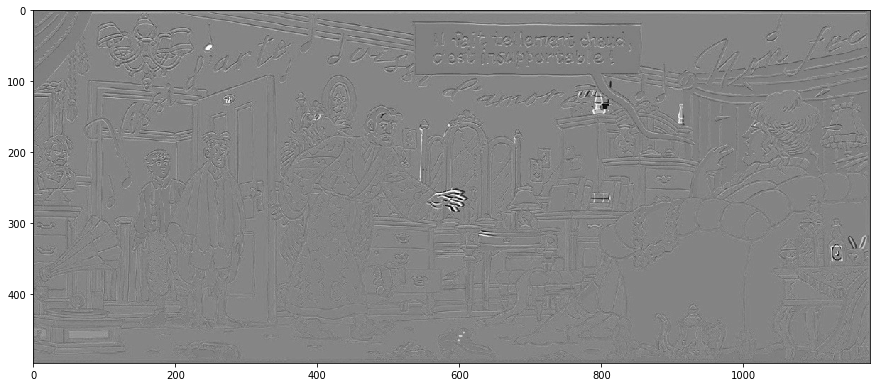

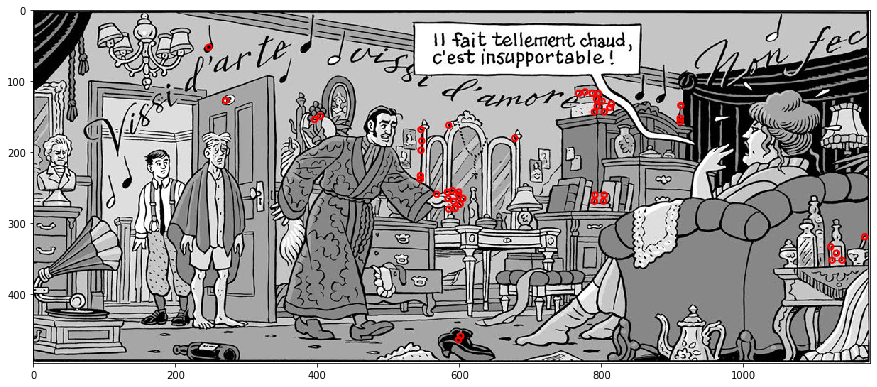

In [77]:
top = color.rgb2gray(io.imread("data/onze-erreurs1.jpg"))
bot = color.rgb2gray(io.imread("data/onze-erreurs2.jpg"))
diff = top-bot
plt.subplots(figsize=(15,10))
plt.imshow(diff, cmap=plt.cm.gray)
# Localisation dans l'image des différences
blobs = [(x[0],x[1],x[2]) for x in feature.blob_log(diff, 
                                                        min_sigma=2.8, 
                                                        max_sigma=20,
                                                        threshold=0.12,
                                                      )]
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1)
for blob in blobs:
    y, x, r = blob
    c = plt.Circle((x, y), r+1, color='red', linewidth=2, fill=False)
    ax.add_patch(c)
plt.imshow(io.imread("data/onze-erreurs2.jpg"))

<button data-toggle="collapse" data-target="#sol9" class='btn btn-primary'>Solution</button>
<div id="sol9" class="collapse">

```python
top = color.rgb2gray(io.imread("data/onze-erreurs1.jpg"))
bot = color.rgb2gray(io.imread("data/onze-erreurs2.jpg"))
diff = top-bot
plt.subplots(figsize=(15,10))
plt.imshow(diff, cmap=plt.cm.gray)
# Localisation dans l'image des différences
blobs = [(x[0],x[1],x[2]) for x in feature.blob_log(diff, 
                                                        min_sigma=2.8, 
                                                        max_sigma=20,
                                                        threshold=0.12,
                                                      )]
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1)
for blob in blobs:
    y, x, r = blob
    c = plt.Circle((x, y), r+1, color='red', linewidth=2, fill=False)
    ax.add_patch(c)
plt.imshow(io.imread("data/onze-erreurs2.jpg"))
```

<img src="data/onze-erreurs-sol.jpg">

</div>

# Pour aller plus loin
* [**Scipy lectures notes**](http://www.scipy-lectures.org/advanced/image_processing/index.html)
* Van der Walt S, Schönberger JL, Nunez-Iglesias J, Boulogne F, Warner JD, Yager N, Gouillart E, Yu T, The scikit-image contributors. 2014. **Scikit-image: image processing in Python.** https://doi.org/10.7717/peerj.453
* **Filtrer le bruit d'une image** : [tutoriel](http://www.askaswiss.com/2016/12/how-to-denoise-images-in-python.html)

## Schlieren

In [86]:
from glob import glob

im_list = glob("ifpen_data/schlieren/*.tif")


In [94]:
stack = np.concatenate([io.imread(im) for im in im_list])
stack = stack.reshape((560, -1, len(im_list)))

In [95]:
stack.shape

(560, 448, 150)

In [115]:
np.uint8(-1)

255

In [111]:

tif0 = io.imread("ifpen_data/schlieren/SCHLIEREN_ID11945000060.tif").astype(int)
tif1 = io.imread("ifpen_data/schlieren/SCHLIEREN_ID11945000061.tif").astype(int)


In [112]:
tif0.shape

(560, 448)

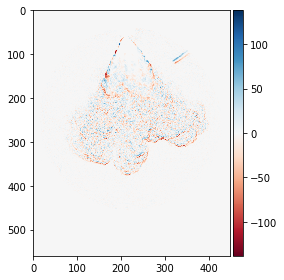

In [114]:
io.imshow(tif1 - tif0)

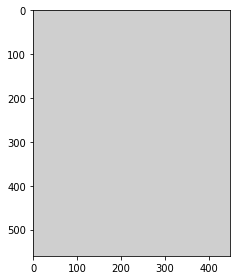

In [125]:
io.imshow(filters.rank.gradient_percentile(((tif1 - tif0)**2).astype(np.uint16), morphology.square(3)), cmap='Greys')

In [ ]:
from skimage

In [110]:
tif1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)